In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statistics import mode

In [2]:
df_infection_states = pd.read_csv("/Users/manansanjaykumarshah/Downloads/Sim_Data_2023_1_9/Sim_Data_2023_1_9_reinfect_0/InfectionStates.csv")

In [3]:
df_infection_states.describe()

,run,tick,currently_infected,new_infected,dead,hospitalized,icu_treated,newly_recovered,recovered,susceptible,...,icu_adults_new,hospitalized_new,hospitalized_children_new,hospitalized_adults_new,cum_icu_all,cum_children_icu,cum_adults_icu,cum_hospital_all,cum_children_hospital,cum_adults_hospital
count,6060.000000,6060.000000,6060.000000,6060.000000,6060.000000,6060.000000,6060.000000,6060.000000,6060.000000,6060.000000,...,6060.000000,6060.000000,6060.000000,6060.000000,6060.000000,6060.000000,6060.000000,6060.000000,6060.000000,6060.000000
mean,51.000000,30.500000,164.390264,18.493234,1.408911,1.128053,0.259901,16.753630,486.606931,102309.984158,...,0.032343,0.114851,0.007756,0.107096,1.056766,0.074917,0.981848,3.360066,0.252805,3.107261
std,29.157165,17.319531,47.227465,7.426670,1.334148,1.118394,0.518936,9.996312,284.081706,284.856299,...,0.184236,0.347595,0.089593,0.332905,1.176212,0.263280,1.144171,2.685358,0.511092,2.559227
min,1.000000,1.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,101297.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,15.750000,139.000000,13.000000,0.000000,0.000000,0.000000,11.000000,245.000000,102089.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,51.000000,30.500000,164.000000,18.000000,1.000000,1.000000,0.000000,16.000000,454.000000,102343.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.000000,0.000000,3.000000
75%,76.000000,45.250000,192.000000,23.000000,2.000000,2.000000,0.000000,23.000000,706.000000,102553.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,5.000000,0.000000,5.000000
max,101.000000,60.000000,367.000000,55.000000,8.000000,7.000000,4.000000,55.000000,1497.000000,102781.000000,...,2.000000,4.000000,2.000000,3.000000,7.000000,1.000000,7.000000,15.000000,3.000000,14.000000


In [4]:
#value=int(input("Enter the run value"))
#new_df_states =df_infection_states.query("run == @value")

In [5]:
#new_df= new_df_states.filter(['tick','currently_infected','new_infected','dead','newly_recovered','recovered','susceptible','ill'], axis=1)

In [6]:
df_infection_states['total_population'] = df_infection_states['dead'] + df_infection_states['recovered']+ df_infection_states['susceptible']

In [7]:
df_infection_states

,run,tick,currently_infected,new_infected,dead,hospitalized,icu_treated,newly_recovered,recovered,susceptible,...,hospitalized_new,hospitalized_children_new,hospitalized_adults_new,cum_icu_all,cum_children_icu,cum_adults_icu,cum_hospital_all,cum_children_hospital,cum_adults_hospital,total_population
0,18,1.0,188,30,0,0,0,23,23,102775,...,0,0,0,0,0,0,0,0,0,102798
1,18,2.0,151,29,0,0,0,36,59,102739,...,0,0,0,0,0,0,0,0,0,102798
2,18,3.0,94,14,0,0,0,42,101,102697,...,0,0,0,0,0,0,0,0,0,102798
3,18,4.0,53,7,0,0,0,34,135,102663,...,0,0,0,0,0,0,0,0,0,102798
4,18,5.0,26,5,0,0,0,25,160,102638,...,0,0,0,0,0,0,0,0,0,102798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6055,98,56.0,154,13,3,2,1,18,706,102089,...,0,0,0,3,0,3,4,0,4,102798
6056,98,57.0,162,19,3,1,0,16,722,102073,...,0,0,0,3,0,3,4,0,4,102798
6057,98,58.0,150,11,3,1,0,18,740,102055,...,0,0,0,3,0,3,4,0,4,102798
6058,98,59.0,143,6,3,1,0,13,753,102042,...,0,0,0,3,0,3,4,0,4,102798


In [8]:
new_df_infection = df_infection_states.groupby('tick')[['currently_infected','dead','recovered','susceptible','total_population']].agg(list)

In [9]:
new_df_infection = new_df_infection.reset_index()

In [10]:
new_df_infection

,tick,currently_infected,dead,recovered,susceptible,total_population
0,1.0,"[188, 209, 201, 185, 198, 195, 195, 201, 193, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[23, 22, 28, 36, 24, 24, 17, 20, 31, 19, 36, 2...","[102775, 102775, 102770, 102762, 102774, 10277...","[102798, 102798, 102798, 102798, 102798, 10279..."
1,2.0,"[151, 152, 159, 140, 151, 146, 142, 140, 152, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[59, 67, 68, 70, 62, 62, 60, 62, 67, 56, 74, 6...","[102739, 102730, 102730, 102728, 102736, 10273...","[102798, 102798, 102798, 102798, 102798, 10279..."
2,3.0,"[94, 97, 104, 100, 102, 110, 99, 88, 97, 93, 9...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[101, 107, 105, 111, 99, 98, 96, 98, 102, 93, ...","[102697, 102690, 102693, 102687, 102699, 10270...","[102798, 102798, 102798, 102798, 102798, 10279..."
3,4.0,"[53, 69, 73, 59, 63, 63, 61, 69, 60, 56, 61, 5...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[135, 137, 131, 138, 130, 129, 127, 122, 137, ...","[102663, 102660, 102667, 102660, 102668, 10266...","[102798, 102798, 102798, 102798, 102798, 10279..."
4,5.0,"[26, 29, 32, 21, 28, 33, 25, 24, 23, 23, 26, 2...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[160, 164, 165, 168, 161, 155, 154, 154, 165, ...","[102638, 102633, 102633, 102630, 102637, 10264...","[102798, 102798, 102798, 102798, 102798, 10279..."
5,6.0,"[59, 76, 78, 57, 69, 71, 67, 75, 68, 63, 78, 7...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[160, 165, 166, 168, 161, 156, 154, 154, 165, ...","[102638, 102632, 102632, 102630, 102637, 10264...","[102798, 102798, 102798, 102798, 102798, 10279..."
6,7.0,"[86, 103, 113, 88, 98, 98, 92, 106, 99, 98, 10...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[162, 166, 167, 168, 162, 157, 154, 154, 165, ...","[102636, 102631, 102631, 102630, 102636, 10264...","[102798, 102798, 102798, 102798, 102798, 10279..."
7,8.0,"[102, 123, 141, 109, 125, 132, 117, 119, 121, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[164, 168, 168, 171, 163, 159, 156, 155, 166, ...","[102634, 102629, 102630, 102627, 102635, 10263...","[102798, 102798, 102798, 102798, 102798, 10279..."
8,9.0,"[110, 141, 156, 116, 131, 134, 138, 130, 121, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, ...","[164, 171, 170, 172, 165, 163, 156, 158, 170, ...","[102634, 102626, 102628, 102626, 102633, 10263...","[102798, 102798, 102798, 102798, 102798, 10279..."
9,10.0,"[116, 146, 152, 115, 132, 135, 139, 138, 125, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, ...","[164, 171, 172, 173, 168, 165, 156, 158, 170, ...","[102634, 102626, 102626, 102625, 102630, 10263...","[102798, 102798, 102798, 102798, 102798, 10279..."


In [11]:
new_df_infection['currently_infected'] = [np.array(x).mean() for x in new_df_infection.currently_infected.values]

new_df_infection['recovered'] = [np.array(x).mean() for x in new_df_infection.recovered.values]
new_df_infection['susceptible'] = [np.array(x).mean() for x in new_df_infection.susceptible.values]
new_df_infection['total_population'] = [np.array(x).mean() for x in new_df_infection.total_population.values]

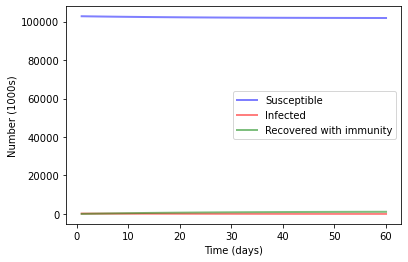

In [12]:
from scipy.integrate import odeint

def sir_model(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt


    # Total population
N = 102798
I = new_df_infection.currently_infected.values
S = new_df_infection.susceptible.values
R = new_df_infection.recovered.values
    
# Initial number of infected and recovered individuals, I0 and R0.
I0 = I[0]
R0 = R[0]
# Everyone else, S0, is susceptible to infection initially.
S0 = S[0]
# Contact rate, beta, and mean recovery rate, gamma, (in 1/time).
beta, gamma = 0.21, 1./4
# A grid of time points (in days)
t = new_df_infection.tick.values
    
# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid
ret = odeint(sir_model, y0, t, args=(N, beta, gamma))
S, I, R = ret.T
    
# Plot the data on three separate curves for S(t), I(t) and R(t)
plt.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
plt.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
plt.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
plt.xlabel('Time (days)')
plt.ylabel('Number (1000s)')
plt.legend()
plt.show()



In [13]:
new_df_infection

,tick,currently_infected,dead,recovered,susceptible,total_population
0,1.0,197.118812,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",25.742574,102772.029703,102798.0
1,2.0,150.029703,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",63.504950,102734.217822,102798.0
2,3.0,99.366337,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",102.831683,102694.891089,102798.0
3,4.0,62.514851,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",133.049505,102664.673267,102798.0
4,5.0,27.178218,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",161.940594,102635.782178,102798.0
5,6.0,70.603960,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",162.594059,102635.000000,102798.0
6,7.0,101.564356,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",163.188119,102634.356436,102798.0
7,8.0,121.891089,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",164.970297,102632.544554,102798.0
8,9.0,131.039604,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, ...",166.702970,102630.782178,102798.0
9,10.0,133.376238,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, ...",168.148515,102629.336634,102798.0


In [14]:
[np.array(x).mean() for x in new_df_infection.dead.values]


[0.22772277227722773,
 0.27722772277227725,
 0.27722772277227725,
 0.27722772277227725,
 0.27722772277227725,
 0.40594059405940597,
 0.45544554455445546,
 0.48514851485148514,
 0.5148514851485149,
 0.5148514851485149,
 0.5544554455445545,
 0.5544554455445545,
 0.594059405940594,
 0.6336633663366337,
 0.7029702970297029,
 0.7326732673267327,
 0.7722772277227723,
 0.8316831683168316,
 0.8712871287128713,
 0.8910891089108911,
 0.9207920792079208,
 1.0,
 1.0693069306930694,
 1.1287128712871286,
 1.1782178217821782,
 1.2376237623762376,
 1.2772277227722773,
 1.3465346534653466,
 1.3762376237623761,
 1.396039603960396,
 1.4356435643564356,
 1.495049504950495,
 1.5148514851485149,
 1.5643564356435644,
 1.5742574257425743,
 1.613861386138614,
 1.6534653465346534,
 1.7128712871287128,
 1.7227722772277227,
 1.801980198019802,
 1.8415841584158417,
 1.891089108910891,
 1.9108910891089108,
 1.9306930693069306,
 1.9603960396039604,
 2.0594059405940595,
 2.1386138613861387,
 2.207920792079208,
 2.247

In [15]:
mode

<function statistics.mode(data)>

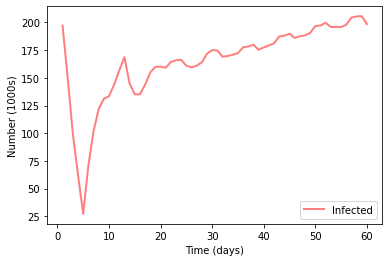

In [16]:
N = 102798
I = new_df_infection.currently_infected.values
S = new_df_infection.susceptible.values
R = new_df_infection.recovered.values
t = new_df_infection.tick.values
    
#plt.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
plt.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
#plt.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered ')
plt.xlabel('Time (days)')
plt.ylabel('Number (1000s)')
plt.legend()
plt.show()

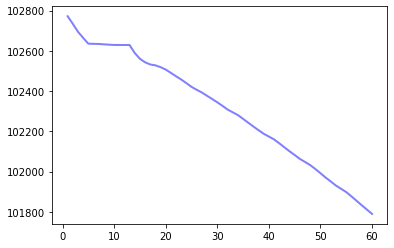

In [17]:
plt.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')

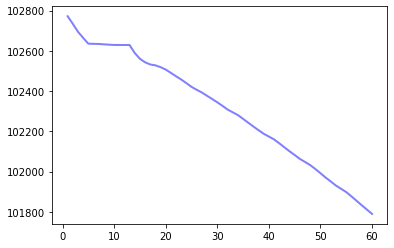

In [18]:
plt.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')


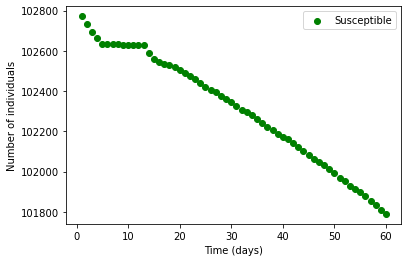

In [19]:
import matplotlib.pyplot as plt
plt.scatter(t, S, label='Susceptible', color='green')
#plt.scatter(t, I, label='Infected', color='red')
#plt.scatter(t, R, label='Recovered', color='blue')
plt.xlabel('Time (days)')
plt.ylabel('Number of individuals')
plt.legend()
plt.show()


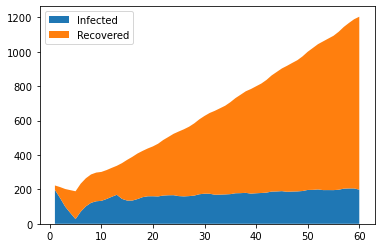

In [20]:
import matplotlib.pyplot as plt
plt.stackplot(t, I, R, labels=['Infected','Recovered'])
plt.legend(loc='upper left')
plt.show()


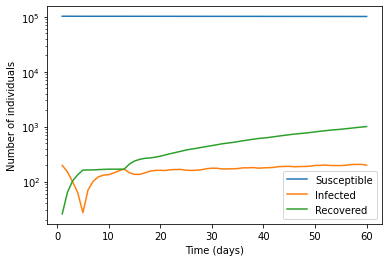

In [21]:
import matplotlib.pyplot as plt
plt.semilogy(t, S, label='Susceptible')
plt.semilogy(t, I, label='Infected')
plt.semilogy(t, R, label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Number of individuals')
plt.legend()
plt.show()



In [30]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=S, name = 'Susceptible',mode='lines+markers'))
fig.add_trace(go.Scatter(x=t, y=I, name = 'Infected',mode='lines+markers'))
fig.add_trace(go.Scatter(x=t, y=R, name = 'Recovered',mode='lines+markers'))
fig.update_layout(yaxis=dict(type='log',title='Number of individuals'))
fig.show()


In [25]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=t, y=S, name = 'Susceptible',mode='lines+markers'))
fig1.show()

In [28]:
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=t, y=I, name = 'Infected',mode='lines+markers'))
fig2.show()

In [29]:
fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=t, y=R, name = 'Recovered',mode='lines+markers'))
fig3.show()